In [12]:
# globals (dev)
FOLDER_MODULES = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\modules'  
FOLDER_SHARED = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\shared'
GRP_LYR_FILE = r"C:\Users\Lewis\Documents\GitHub\tenement-tools\arc\lyr\group_template.lyrx"

# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': 'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# safe imports
import sys                  # arcgis comes with these
import datetime                 # arcgis comes with these
import pandas as pd
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    from odc import stac
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import cog_odc, canopy, nicher, vegfrax
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise

In [13]:
from importlib import reload
reload(vegfrax)

<module 'vegfrax' from 'C:\\Users\\Lewis\\Documents\\GitHub\\tenement-tools\\modules\\vegfrax.py'>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

df_samples = pd.read_csv(r'C:\Users\Lewis\Desktop\roy_frax\test.csv')

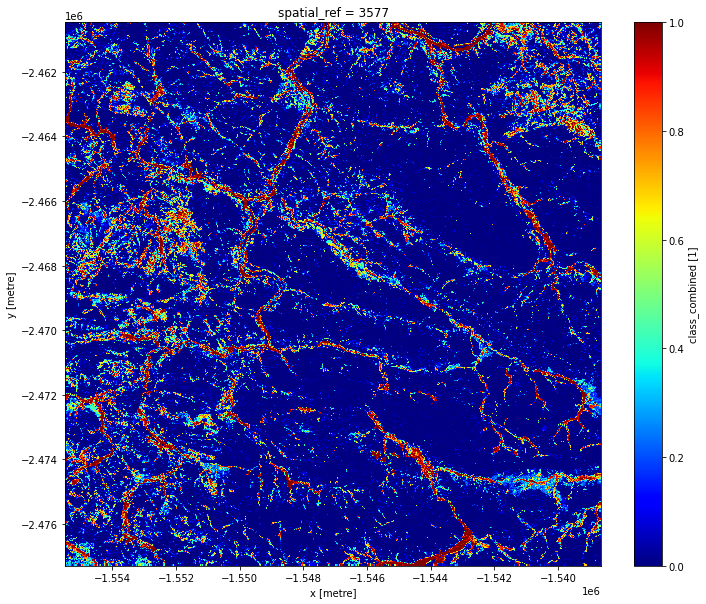

In [62]:
file = r"C:\Users\Lewis\Desktop\test\t.nc"
ds = xr.open_dataset(file)

fig = plt.figure(figsize=[12, 10])
ds['class_combined'].plot(cmap='jet', robust=False)
plt.show()

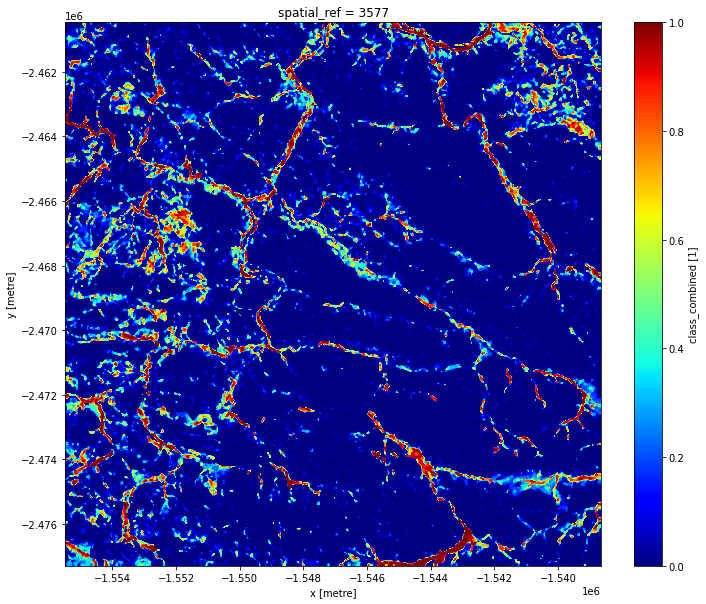

In [71]:
file = r"C:\Users\Lewis\Desktop\test\t.nc"
ds = xr.open_dataset(file)



fig = plt.figure(figsize=[12, 10])
ds['class_combined'].plot(cmap='jet', robust=False)
plt.show()

In [ ]:
def smooth(ds):
    """
    Takes a xarray dataset of fractional class outputs and 
    applies mild smoothing via a median filter.
    
    Parameters
    ----------
    ds : xarray dataset
        A dataset with x, y dims with class variables.
        
    Returns
    ----------
    ds : xarray dataset
    """
    
    # check dataset
    if not isinstance(ds, xr.Dataset):
        raise TypeError('Not an xarray dataset.')
    elif 'x' not in ds or 'y' not in ds:
        raise TypeError('Dataset does not contain an x or y dimension.')
        
    # create moving 3 x 3 window, apply median filter
    ds = ds.rolling(x=3, y=3, center=True, min_periods=1).median()
    
    return ds